In [2]:
import numpy as np
import pandas as pd
import subprocess
import re
import seaborn as sns

In [1]:
%%bash
source ~/.bashrc
conda activate beagle
rm  ../calls/wgs_samples.vcf.gz.tbi
bcftools view -m2 -M2 -v snps -T ../calls/panel_positions.tsv \
    --samples ^A131 ../calls/apal_imputation_panel_filtered.bcf \
    | bcftools annotate --remove "INFO" \
    | bcftools +fill-tags -- -t all \
    | bcftools view -O z > ../calls/wgs_samples.vcf.gz
tabix ../calls/wgs_samples.vcf.gz

rm: cannot remove '../calls/wgs_samples.vcf.gz.tbi': No such file or directory


In [82]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools query -l ../calls/wgs_samples.vcf.gz \
    > ../ref_panel_sample_list.txt

In [109]:
metadata = pd.read_csv("../2024_01_12_PsuData_fixed.csv")
metadata = metadata.reset_index(drop=False)
metadata.columns = ['GWAS_name', 'genetNumber', 'FixedTubeID', 'cbassRun', 'species', 'Notes',
       'Novogene_ID', 'geno', 'Best Galaxy Match Reef Name',
       'Best Galaxy Match Clonal ID', 'Fixed Best Galaxy Match Clonal ID',
       'Best Galaxy Match KING Coefficient', 'Questionable?', 'presumed_geno',
       'name', 'year', 'nursery', 'region', 'fixed_ed50', 'ed50', 'stdError',
       'nurseRes', 'ed50Adj', 'temperature', 'fixed_logSh', 'logSh', 'dom',
       'Best Galaxy Match', 'Best Galaxy Match User ID']
metadata["GWAS_name"] = "sample" + metadata["GWAS_name"].astype(str) 
metadata["wgs_data"] = metadata["Novogene_ID"].fillna(0)

In [110]:
pacbiosamples = ["A20148",
                    "A20151",
                    "A20153",
                    "A20154",
                    "A20155",
                    "A20156"]

In [111]:
for i in range(len(metadata)):
    if metadata["wgs_data"][i] == 0 :
        try:
            metadata["wgs_data"][i] = (metadata["Novogene_ID"]
                 [metadata["Fixed Best Galaxy Match Clonal ID"] == 
                  metadata["Fixed Best Galaxy Match Clonal ID"][i]]
                 [metadata["Novogene_ID"].notna()]
                [~metadata["Novogene_ID"].isin(pacbiosamples)].sample(1, 
                    random_state = i)).reset_index(drop=True)[0]
        except:
            pass
metadata.loc[metadata["wgs_data"] == 0, "wgs_data"] = np.nan

/tmp/ipykernel_1413764/2051846829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["wgs_data"][i] = (metadata["Novogene_ID"]


In [112]:
wgssamples = metadata[metadata["wgs_data"].notna()][metadata["region"] == "Florida"].reset_index(drop=True)

/tmp/ipykernel_1413764/1597219241.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wgssamples = metadata[metadata["wgs_data"].notna()][metadata["region"] == "Florida"].reset_index(drop=True)


In [124]:
for i in list(range(0,100)):
    task = "subset_vcf"
    mem = "16"
    cpus = "1"
    infile = "../calls/wgs_samples.vcf.gz"
    outpath = "~/scratch"
    samp = wgssamples["wgs_data"][i]
    gwas_id = str(wgssamples["GWAS_name"][i])
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         infile + " " + outpath + " " + samp + " " + gwas_id], shell=True)

Submitted batch job 9032708
Submitted batch job 9032709
Submitted batch job 9032711
Submitted batch job 9032712
Submitted batch job 9032713
Submitted batch job 9032714
Submitted batch job 9032715
Submitted batch job 9032716
Submitted batch job 9032717
Submitted batch job 9032718
Submitted batch job 9032719
Submitted batch job 9032720
Submitted batch job 9032721
Submitted batch job 9032722
Submitted batch job 9032723
Submitted batch job 9032724
Submitted batch job 9032725
Submitted batch job 9032726
Submitted batch job 9032727
Submitted batch job 9032728
Submitted batch job 9032729
Submitted batch job 9032730
Submitted batch job 9032731
Submitted batch job 9032732
Submitted batch job 9032733
Submitted batch job 9032734
Submitted batch job 9032735
Submitted batch job 9032736
Submitted batch job 9032737
Submitted batch job 9032738
Submitted batch job 9032739
Submitted batch job 9032740
Submitted batch job 9032741
Submitted batch job 9032743
Submitted batch job 9032744
Submitted batch job 

In [127]:
for i in list(range(100,200)):
    task = "subset_vcf"
    mem = "16"
    cpus = "1"
    infile = "../calls/wgs_samples.vcf.gz"
    outpath = "~/scratch"
    samp = wgssamples["wgs_data"][i]
    gwas_id = str(wgssamples["GWAS_name"][i])
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         infile + " " + outpath + " " + samp + " " + gwas_id], shell=True)

Submitted batch job 9033065
Submitted batch job 9033066
Submitted batch job 9033067
Submitted batch job 9033068
Submitted batch job 9033069
Submitted batch job 9033070
Submitted batch job 9033071
Submitted batch job 9033072
Submitted batch job 9033073
Submitted batch job 9033074
Submitted batch job 9033075
Submitted batch job 9033076
Submitted batch job 9033077
Submitted batch job 9033078
Submitted batch job 9033079
Submitted batch job 9033080
Submitted batch job 9033081
Submitted batch job 9033082
Submitted batch job 9033083
Submitted batch job 9033084
Submitted batch job 9033085
Submitted batch job 9033086
Submitted batch job 9033087
Submitted batch job 9033088
Submitted batch job 9033089
Submitted batch job 9033090
Submitted batch job 9033091
Submitted batch job 9033092
Submitted batch job 9033093
Submitted batch job 9033094
Submitted batch job 9033095
Submitted batch job 9033096
Submitted batch job 9033097
Submitted batch job 9033098
Submitted batch job 9033100
Submitted batch job 

In [129]:
list(range(100,200))

[100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199]

In [128]:
wgssamples

,GWAS_name,genetNumber,FixedTubeID,cbassRun,species,Notes,Novogene_ID,geno,Best Galaxy Match Reef Name,Best Galaxy Match Clonal ID,...,stdError,nurseRes,ed50Adj,temperature,fixed_logSh,logSh,dom,Best Galaxy Match,Best Galaxy Match User ID,wgs_data
0,sample0,1,1,1.0,Apal,NaN,A21999,Brewster-Y94,Brew,HG1459,...,0.055473,0.374353,36.709556,30C,-2.109252,-2.109252,A,121178064_(Axiom_AcropSNP)_M09.CEL,3365,A21999
1,sample1,2,2,1.0,Apal,NaN,NaN,Apal-032,NaN,NaN,...,0.145863,-0.584565,35.750639,30C,-1.120739,-1.120739,A,NaN,NaN,A22231
2,sample2,3,3,1.0,Apal,NaN,A22001,Key Largo-G28,Horseshoe,HG0004,...,0.111373,-0.015990,36.319214,30C,-1.804099,-1.804099,A,a100000-4368120-060520-256_A01.CEL,1012,A22001
3,sample3,4,4,1.0,Apal,NaN,A22002,Brewster-Y99,Brew,HG1459,...,0.059475,0.164460,36.499663,30C,-2.313155,-2.313155,A,121178064_(Axiom_AcropSNP)_M09.CEL,3365,A22002
4,sample4,5,5,1.0,Apal,NaN,A22003,Brewster-Y92,Brew,HG1459,...,0.090066,0.014127,36.349331,30C,-1.512002,-1.512002,A,121178064_(Axiom_AcropSNP)_M09.CEL,3365,A22003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,sample262,1037,1037,NaN,NaN,NaN,SRR7235980,NaN,LittleGrecian,HG0104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a100000-4368120-060520-256_C01.CEL,1037,SRR7235980
226,sample265,1012,1012,NaN,NaN,NaN,SRR7235983,NaN,Horseshoe,HG0004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a100000-4368120-060520-256_A01.CEL,1012,SRR7235983
227,sample271,6895,6895,NaN,NaN,NaN,SRR7236001,NaN,SI3,HG0106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a100000-4368120-060520-256_O05.CEL,6895,SRR7236001
228,sample278,2699,2699,NaN,NaN,NaN,SRR7236011,NaN,FR2,HG0112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a100000-4368120-060520-256_E03.CEL,2699,SRR7236011


In [122]:
for i in range(len(wgssamples.tail(30))):
    task = "subset_vcf"
    mem = "16"
    cpus = "1"
    infile = "../calls/wgs_samples.vcf.gz"
    outpath = "~/scratch"
    samp = wgssamples["wgs_data"][i]
    gwas_id = str(wgssamples["GWAS_name"][i])
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         infile + " " + outpath + " " + samp + " " + gwas_id], shell=True)

Submitted batch job 9032554
Submitted batch job 9032555
Submitted batch job 9032556
Submitted batch job 9032557
Submitted batch job 9032558
Submitted batch job 9032559
Submitted batch job 9032560
Submitted batch job 9032561
Submitted batch job 9032562
Submitted batch job 9032563
Submitted batch job 9032564
Submitted batch job 9032565
Submitted batch job 9032566
Submitted batch job 9032567
Submitted batch job 9032568
Submitted batch job 9032569
Submitted batch job 9032570
Submitted batch job 9032571
Submitted batch job 9032572
Submitted batch job 9032573
Submitted batch job 9032574
Submitted batch job 9032575
Submitted batch job 9032576
Submitted batch job 9032577
Submitted batch job 9032578
Submitted batch job 9032579
Submitted batch job 9032580
Submitted batch job 9032581
Submitted batch job 9032582
Submitted batch job 9032583


In [84]:
panelsamples = pd.read_csv("../ref_panel_sample_list.txt", header = None, names = ["Novogene_ID"])

In [351]:
reheader = panelsamples.merge(metadata[["Novogene_ID", "GWAS_name"]], how = "left", on = "Novogene_ID")

In [9]:
reheader.set_index("Novogene_ID").to_csv("../refpanel_reheader.txt", sep = "\t", header = None)

In [10]:
%%bash
source ~/.bashrc
conda activate beagle
rm ../calls/wgs_samples_rehead.vcf.gz.tbi
bcftools reheader ../calls/wgs_samples.vcf.gz \
    --samples ../refpanel_reheader.txt \
    > ../calls/wgs_samples_rehead.vcf.gz
tabix ../calls/wgs_samples_rehead.vcf.gz

In [11]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools query -l ../calls/wgs_samples.vcf.gz \
    > ../ref_panel_sample_list.txt

In [356]:
%%bash
source ~/.bashrc
conda activate beagle
rm ../calls/final_gwas_dataset.vcf.gz.tbi
bcftools merge ../calls/wgs_samples_rehead.vcf.gz \
    ../calls/phenotyped_microarray_imputed_filteredDR2.vcf.gz \
    -O z > ../calls/final_gwas_dataset.vcf.gz
tabix ../calls/final_gwas_dataset.vcf.gz

rm: cannot remove '../calls/final_gwas_dataset.vcf.gz.tbi': No such file or directory
Exception ignored in: <function BaseSubprocessTransport.__del__ at 0x148b1a182ef0>
Traceback (most recent call last):
  File "/storage/group/ibb3/default/.conda/envs/masters/lib/python3.10/asyncio/base_subprocess.py", line 123, in __del__
    def __del__(self, _warn=warnings.warn):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
metadata = pd.read_csv("../2024_01_12_PsuData_fixed.csv")
metadata = metadata.reset_index(drop=False)
metadata["Notes"] = metadata["Notes"].fillna("")
metadata.columns = ['GWAS_name', 'genetNumber', 'FixedTubeID', 'cbassRun', 'species', 'Notes',
       'Novogene_ID', 'geno', 'Best Galaxy Match Reef Name',
       'Best Galaxy Match Clonal ID', 'Fixed Best Galaxy Match Clonal ID',
       'Best Galaxy Match KING Coefficient', 'Questionable?', 'presumed_geno',
       'name', 'year', 'nursery', 'region', 'fixed_ed50', 'ed50', 'stdError',
       'nurseRes', 'ed50Adj', 'temperature', 'fixed_logSh', 'logSh', 'dom',
       'Best Galaxy Match', 'Best Galaxy Match User ID']
metadata["GWAS_name"] = "sample" + metadata["GWAS_name"].astype(str) 

In [ ]:
metadata = (metadata[~metadata["Notes"].str.contains("Abnormally")]
 [metadata["fixed_ed50"].notna()]
 [metadata["fixed_logSh"].notna()])

In [ ]:
metadata[["GWAS_name", "GWAS_name"]].to_csv("../calls/GEMMA_no_missing.txt", 
                                                                   header = None, 
                                                                   sep = "\t", index = False)

In [ ]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink --vcf ../calls/final_gwas_dataset.vcf.gz \
    --allow-extra-chr --keep ../calls/GEMMA_no_missing.txt \
    --make-bed --out ../calls/final_gwas_dataset

In [283]:
!cut -d" " -f1 ../calls/final_gwas_dataset.fam > ../calls/final_gwas_dataset_sample_order.txt

In [285]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools view --targets-file ../microarray_positions.tsv \
    ../calls/final_gwas_dataset.vcf.gz \
    | bcftools annotate --set-id +'%CHROM\_%POS\_%REF\_%FIRST_ALT' \
    -O z > ~/scratch/gemma_pca.vcf.gz

In [310]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ~/scratch/gemma_pca.vcf.gz \
    --thin 20000 --maf 0.05 \
    --recode --out ../calls/gemma_pca

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /storage/home/nsl5160/scratch/gemma_pca.vcf.gz
	--maf 0.05
	--thin 20000
	--out ../calls/gemma_pca
	--recode

Using zlib version: 1.2.11
After filtering, kept 294 out of 294 Individuals
Outputting VCF file...
After filtering, kept 2826 out of a possible 5677 Sites
Run Time = 4.00 seconds


In [313]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/gemma_pca.recode.vcf \
    --allow-extra-chr \
    --make-king-table \
    --out ../calls/gemma_pca

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../calls/gemma_pca.log.
Options in effect:
  --allow-extra-chr
  --make-king-table
  --out ../calls/gemma_pca
  --vcf ../calls/gemma_pca.recode.vcf

Start time: Thu Feb  8 11:47:03 2024
128802 MiB RAM detected; reserving 64401 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 2826 variants scanned.
--vcf: ../calls/gemma_pca-temporary.pgen + ../calls/gemma_pca-temporary.pvar +
../calls/gemma_pca-temporary.psam written.
294 samples (0 females, 0 males, 294 ambiguous; 294 founders) loaded from
../calls/gemma_pca-temporary.psam.
2826 variants loaded from ../calls/gemma_pca-temporary.pvar.
Note: 

In [314]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/gemma_pca.recode.vcf \
    --allow-extra-chr \
    --king-cutoff 0.25 \
    --out ../calls/gemma_pca

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../calls/gemma_pca.log.
Options in effect:
  --allow-extra-chr
  --king-cutoff 0.25
  --out ../calls/gemma_pca
  --vcf ../calls/gemma_pca.recode.vcf

Start time: Thu Feb  8 11:47:11 2024
128802 MiB RAM detected; reserving 64401 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 2826 variants scanned.
--vcf: ../calls/gemma_pca-temporary.pgen + ../calls/gemma_pca-temporary.pvar +
../calls/gemma_pca-temporary.psam written.
294 samples (0 females, 0 males, 294 ambiguous; 294 founders) loaded from
../calls/gemma_pca-temporary.psam.
2826 variants loaded from ../calls/gemma_pca-temporary.pvar.
Note:

In [320]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/final_gwas_dataset.vcf.gz \
    --thin 20000 --keep ../calls/gemma_pca.king.cutoff.in.id \
    --recode --out ../calls/gemma_pca_thinned

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/final_gwas_dataset.vcf.gz
	--keep ../calls/gemma_pca.king.cutoff.in.id
	--thin 20000
	--out ../calls/gemma_pca_thinned
	--recode

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 168 out of 294 Individuals
Outputting VCF file...
After filtering, kept 14010 out of a possible 2343144 Sites
Run Time = 140.00 seconds


In [321]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/gemma_pca_thinned.recode.vcf \
    --allow-extra-chr --mac 3 \
    --pca \
    --out ../calls/gemma_pca

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../calls/gemma_pca.log.
Options in effect:
  --allow-extra-chr
  --mac 3
  --out ../calls/gemma_pca
  --pca
  --vcf ../calls/gemma_pca_thinned.recode.vcf

Start time: Thu Feb  8 11:50:30 2024
128802 MiB RAM detected; reserving 64401 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 14010 variants scanned.
--vcf: ../calls/gemma_pca-temporary.pgen + ../calls/gemma_pca-temporary.pvar +
../calls/gemma_pca-temporary.psam written.
168 samples (0 females, 0 males, 168 ambiguous; 168 founders) loaded from
../calls/gemma_pca-temporary.psam.
14010 variants loaded from ../calls/gemma_pca-temporary.pvar

In [322]:
metadata = pd.read_csv("../2024_01_12_PsuData_fixed.csv")
metadata = metadata.reset_index(drop=False)
metadata["Notes"] = metadata["Notes"].fillna("")
metadata.columns = ['GWAS_name', 'genetNumber', 'FixedTubeID', 'cbassRun', 'species', 'Notes',
       'Novogene_ID', 'geno', 'Best Galaxy Match Reef Name',
       'Best Galaxy Match Clonal ID', 'Fixed Best Galaxy Match Clonal ID',
       'Best Galaxy Match KING Coefficient', 'Questionable?', 'presumed_geno',
       'name', 'year', 'nursery', 'region', 'fixed_ed50', 'ed50', 'stdError',
       'nurseRes', 'ed50Adj', 'temperature', 'fixed_logSh', 'logSh', 'dom',
       'Best Galaxy Match', 'Best Galaxy Match User ID']
metadata["GWAS_name"] = "sample" + metadata["GWAS_name"].astype(str) 

In [323]:
tmp = pd.read_csv("../calls/gemma_pca.eigenvec", sep = "\t")

In [324]:
tmp.columns = ['GWAS_name', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
       'PC10']

In [325]:
metadata = metadata.merge(tmp, how = "left", on = "GWAS_name").reset_index(drop=True)

<Axes: xlabel='PC1', ylabel='PC2'>

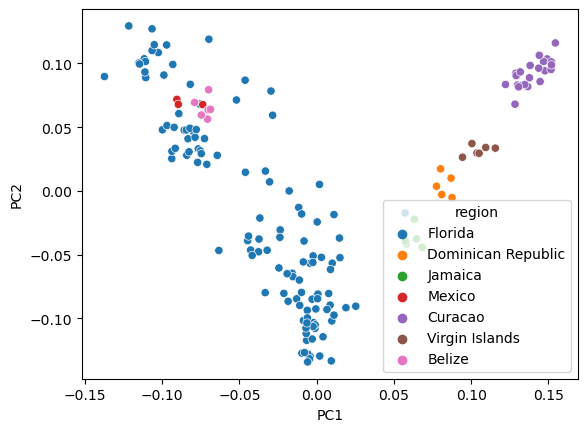

In [326]:
sns.scatterplot(data = metadata, x = "PC1", y = "PC2", hue = "region")

for i in range(len(metadata)):
    if metadata["Best Galaxy Match Clonal ID"][i] is np.nan:
        metadata["Best Galaxy Match Clonal ID"][i] = metadata["presumed_geno"][i]

Since we excluded related individuals in the PCA, we have to add them back in here (by re-using coordinates from clonemates):

In [327]:
for i in range(len(metadata)):
    if np.isnan(metadata["PC1"][i]):
        try:
            metadata["PC1"][i] = (metadata["PC1"][metadata["Fixed Best Galaxy Match Clonal ID"] 
                                                  == metadata["Fixed Best Galaxy Match Clonal ID"][i]]
                              [metadata["PC1"].notna()].reset_index(drop=True))[0]
            metadata["PC2"][i] = (metadata["PC2"][metadata["Fixed Best Galaxy Match Clonal ID"] 
                                                  == metadata["Fixed Best Galaxy Match Clonal ID"][i]]
                              [metadata["PC2"].notna()].reset_index(drop=True))[0]
            metadata["PC3"][i] = (metadata["PC3"][metadata["Fixed Best Galaxy Match Clonal ID"] 
                                                  == metadata["Fixed Best Galaxy Match Clonal ID"][i]]
                              [metadata["PC3"].notna()].reset_index(drop=True))[0]
            metadata["PC4"][i] = (metadata["PC4"][metadata["Fixed Best Galaxy Match Clonal ID"] 
                                                  == metadata["Fixed Best Galaxy Match Clonal ID"][i]]
                              [metadata["PC4"].notna()].reset_index(drop=True))[0]
            metadata["PC5"][i] = (metadata["PC5"][metadata["Fixed Best Galaxy Match Clonal ID"] 
                                                  == metadata["Fixed Best Galaxy Match Clonal ID"][i]]
                              [metadata["PC5"].notna()].reset_index(drop=True))[0]
        except:
            pass

/tmp/ipykernel_2404017/1786308099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["PC1"][i] = (metadata["PC1"][metadata["Fixed Best Galaxy Match Clonal ID"]
/tmp/ipykernel_2404017/1786308099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["PC2"][i] = (metadata["PC2"][metadata["Fixed Best Galaxy Match Clonal ID"]
/tmp/ipykernel_2404017/1786308099.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["PC

In [331]:
sampleorder = pd.read_csv("../calls/final_gwas_dataset_sample_order.txt", header = None, names = ["GWAS_name"])

In [332]:
metadata = metadata[metadata["GWAS_name"].isin(sampleorder["GWAS_name"].tolist())].reset_index(drop=True)

In [336]:
phenodata = metadata[["GWAS_name", 'genetNumber', "nursery", "year", "fixed_ed50", "fixed_logSh", "PC1", "PC2", "PC3", "PC4", "PC5"]]

In [337]:
phenodata = pd.concat([phenodata, pd.get_dummies(phenodata[["nursery"]])], axis = 1)

In [338]:
phenodata.loc[phenodata["year"] == 2022, "year"] = "twentytwo"
phenodata.loc[phenodata["year"] == 2023, "year"] = "twentythree"

In [339]:
phenodata = pd.concat([phenodata, pd.get_dummies(phenodata[["year"]])], axis = 1)

phenodata["ed50"] = phenodata["ed50"].fillna("NA")
phenodata["logSh"] = phenodata["logSh"].fillna("")

In [340]:
sampleorder = phenodata.copy()

In [341]:
sampleorder["intercept"] = 1

In [342]:
sampleorder["nursery_latitude"] = np.nan
sampleorder.loc[sampleorder["nursery_CRF"] == 1, "nursery_latitude"] = 24.982212
sampleorder.loc[sampleorder["nursery_RR"] == 1, "nursery_latitude"] = 24.980650
sampleorder.loc[sampleorder["nursery_UM"] == 1, "nursery_latitude"] = 25.362550

In [343]:
(sampleorder[["intercept", "nursery_latitude", "PC1", "PC2", "PC3"]]#, "nursery_CRF", "nursery_RR", "nursery_UM"]]
 .set_index("intercept")
 .to_csv("../calls/gemma_covar.cov", sep = "\t", header = None))

In [344]:
(sampleorder[["fixed_ed50", "fixed_logSh"]].set_index("fixed_ed50")
 .to_csv("../calls/gemma_pheno.pheno", sep = "\t", header = None))

In [345]:
%%bash
cd ../calls
cut -d' ' -f1,2,3,4,5 final_gwas_dataset.fam > final_gwas_dataset_modified.fam
paste -d ' ' final_gwas_dataset_modified.fam gemma_pheno.pheno > final_gwas_dataset.fam

In [346]:
locoannotation = pd.read_csv("../calls/final_gwas_dataset.bim", sep = "\t", header = None)

In [347]:
locoannotation["ID"] = locoannotation[0] + locoannotation[3].astype(str)

In [348]:
locoannotation[["ID", 3, 0]].set_index("ID").to_csv("../calls/annotation.csv", sep = ",", header = None)